# Example on how to use AnalysisTool & PlottingTool

### Importing tools

In [1]:
# Using the pandas module is mandatory
import pandas as pd
from data_analysis_plotting_tools.AnalysisTool import AnalysisTool
from data_analysis_plotting_tools.PlottingTool import PlottingTool

### Turn data sets into pandas DataFrames and preprocess them

In [2]:
# Convert Berlin data set to pandas DataFrame
df_berlin = pd.read_csv('berlin_2020-01-01_2024-01-27.csv')


# Create object
df_name_berlin = 'berlin'
analysis_tool = AnalysisTool(df_name_berlin, df_berlin)


# Decide which columns NOT to use
columns_to_drop = ['Unnamed: 0',
                   'temperature_2m_mean',
                   'apparent_temperature_max',
                   'apparent_temperature_min',
                   'sunrise', 
                   'sunset', 
                   'wind_speed_10m_max', 
                   'wind_gusts_10m_max', 
                   'wind_direction_10m_dominant', 
                   'shortwave_radiation_sum', 
                   'et0_fao_evapotranspiration']


# Decide which columns to use
columns_to_check = ['weather_code', 
                    'temperature_2m_max', 
                    'temperature_2m_min', 
                    'apparent_temperature_mean',
                    'daylight_duration', 
                    'sunshine_duration', 
                    'precipitation_sum', 
                    'rain_sum', 
                    'snowfall_sum',
                    'precipitation_hours']


# Preprocess the data set to be used for plotting later
analysis_tool.preprocess_data_set(columns_to_drop, columns_to_check, disable_feedback=True)


preprocessed_df = analysis_tool.get_data_frame()
print(preprocessed_df)


summary = analysis_tool.get_statistical_summary()
print(summary)

            date  weather_code  temperature_2m_max  temperature_2m_min  \
0     2020-01-01           2.0              4.0585             -2.8915   
1     2020-01-02           3.0              5.3085             -3.6915   
4     2020-01-05           3.0              3.7585             -1.8415   
5     2020-01-06           3.0              5.1085              0.7085   
6     2020-01-07           3.0              5.1085             -1.2415   
...          ...           ...                 ...                 ...   
1480  2024-01-20           3.0              3.0585             -3.2415   
1481  2024-01-21           3.0              3.0585             -4.7915   
1483  2024-01-23          51.0              7.5585              2.5085   
1485  2024-01-25          51.0              8.3585              4.4085   
1487  2024-01-27           3.0              6.7585              1.2085   

      apparent_temperature_mean  daylight_duration  sunshine_duration  \
0                     -2.819745       

### Plot preprocessed data sets

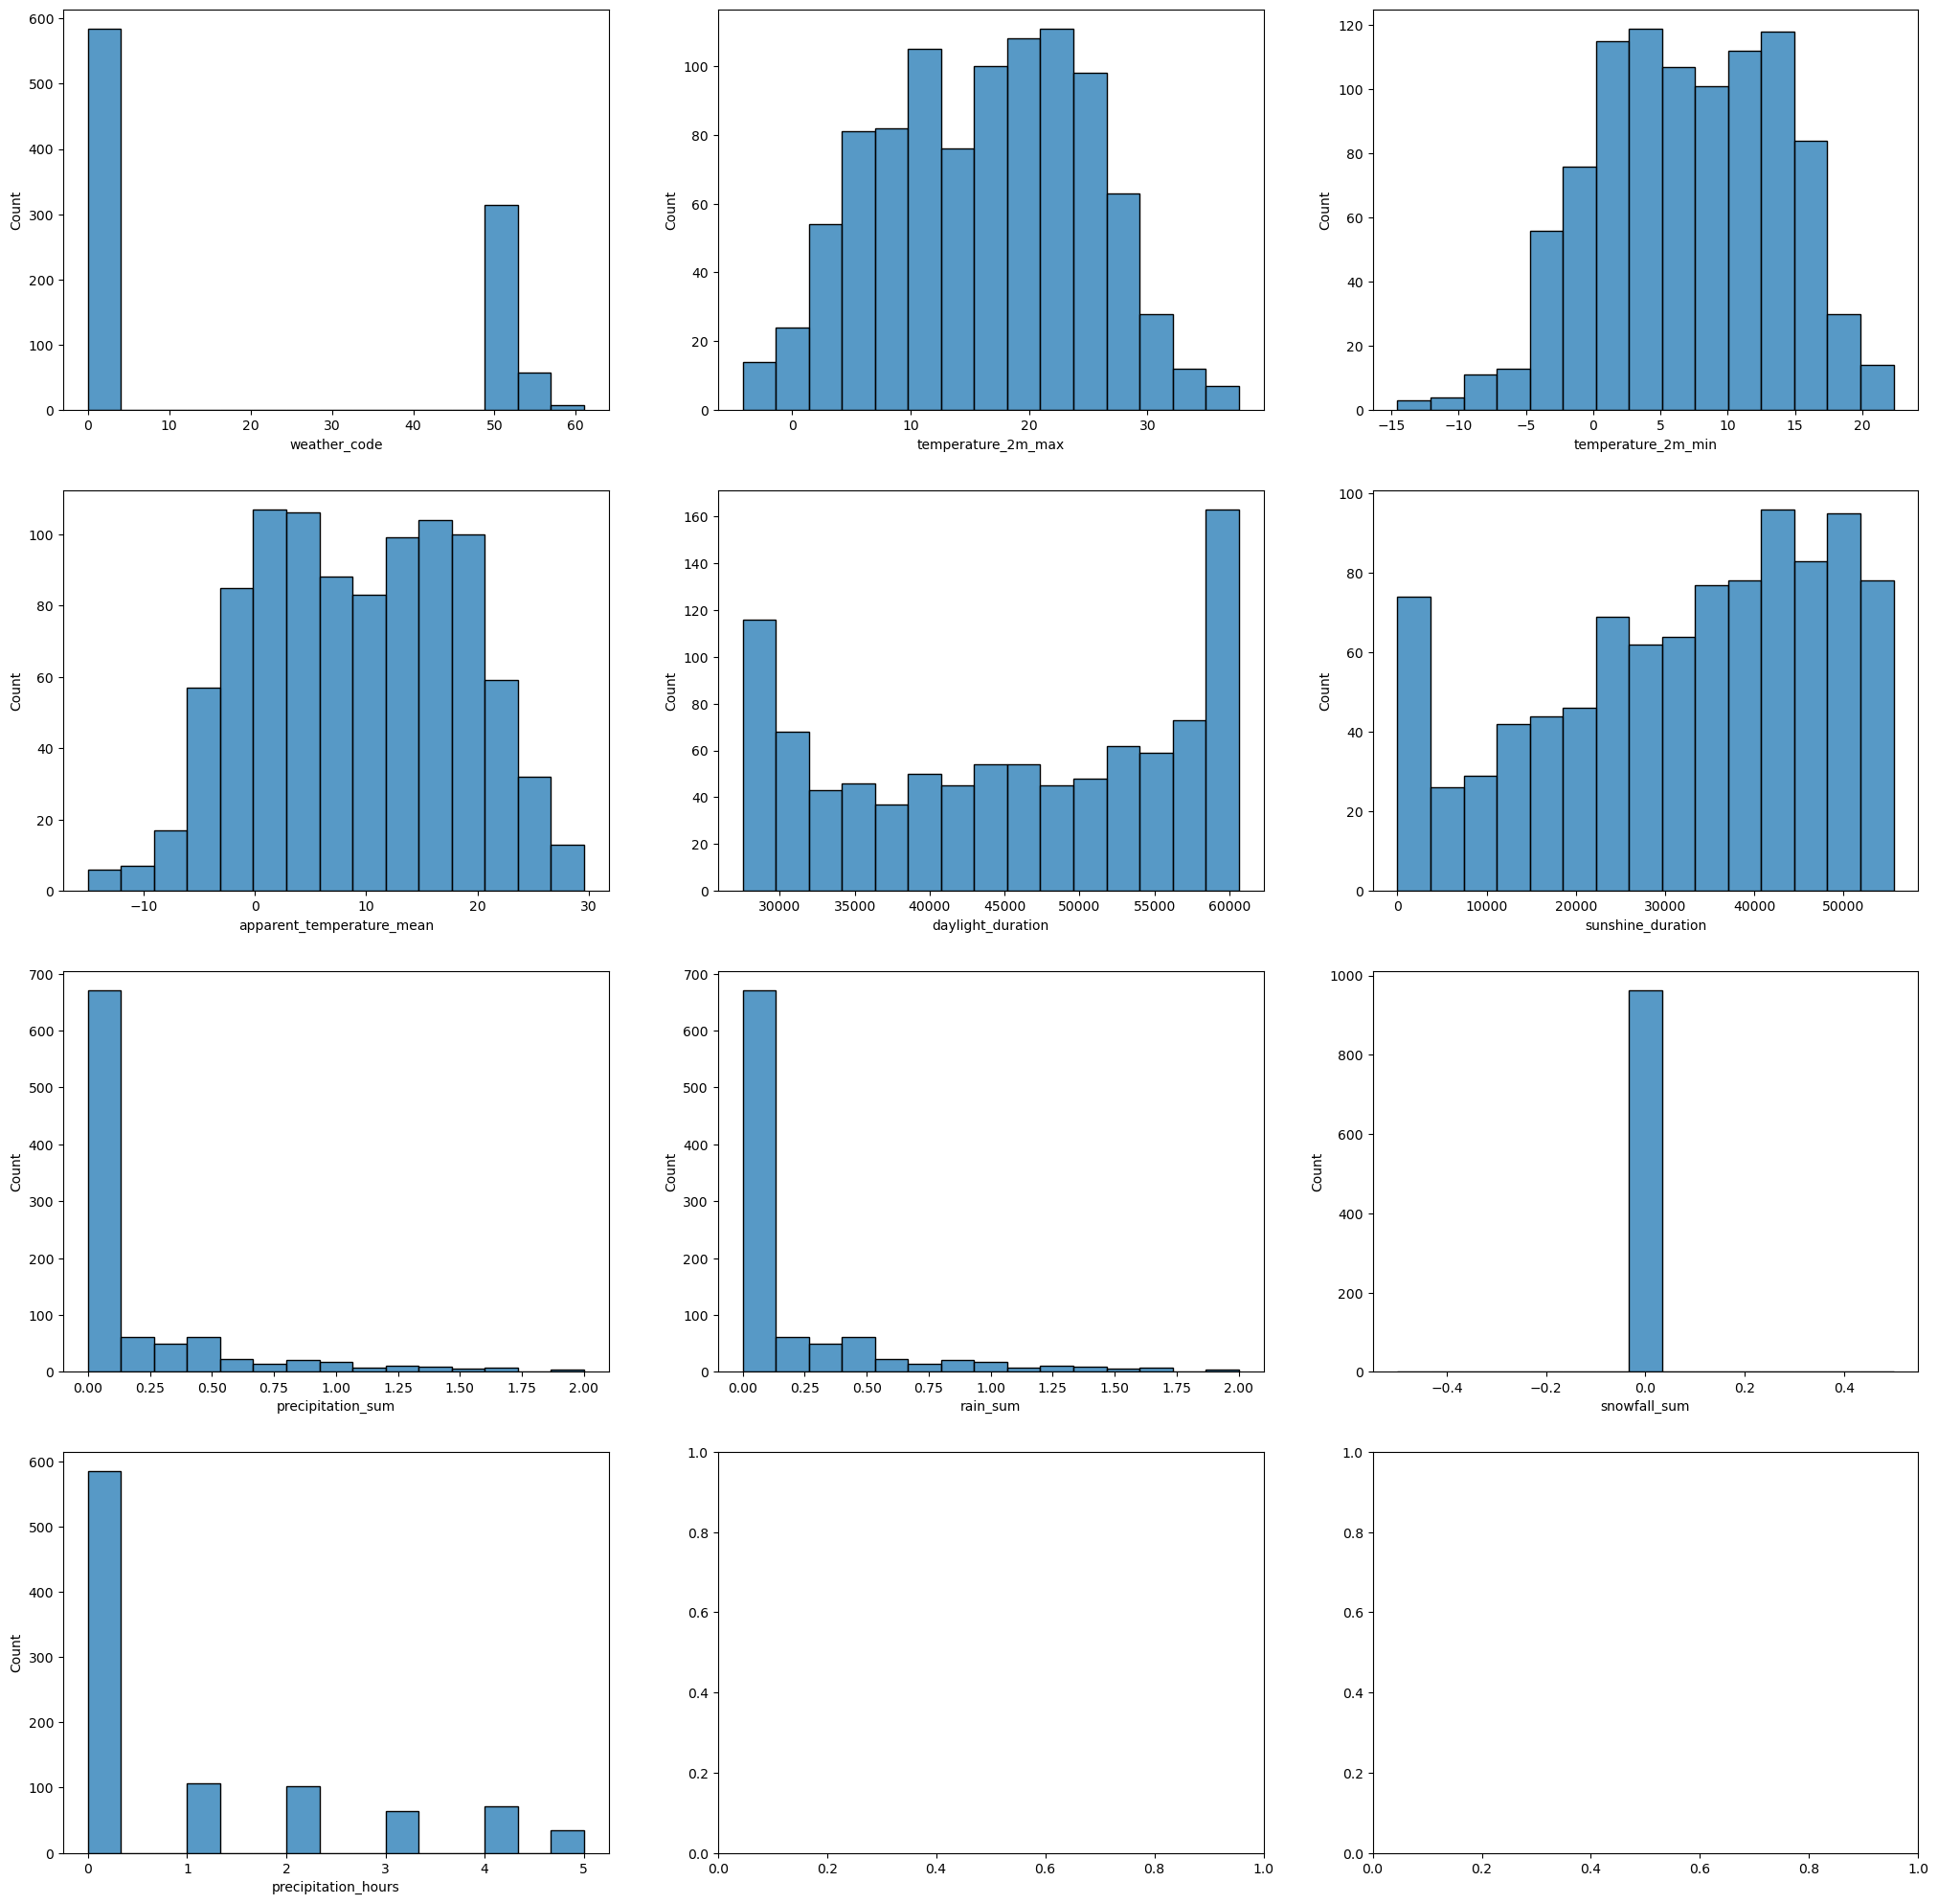

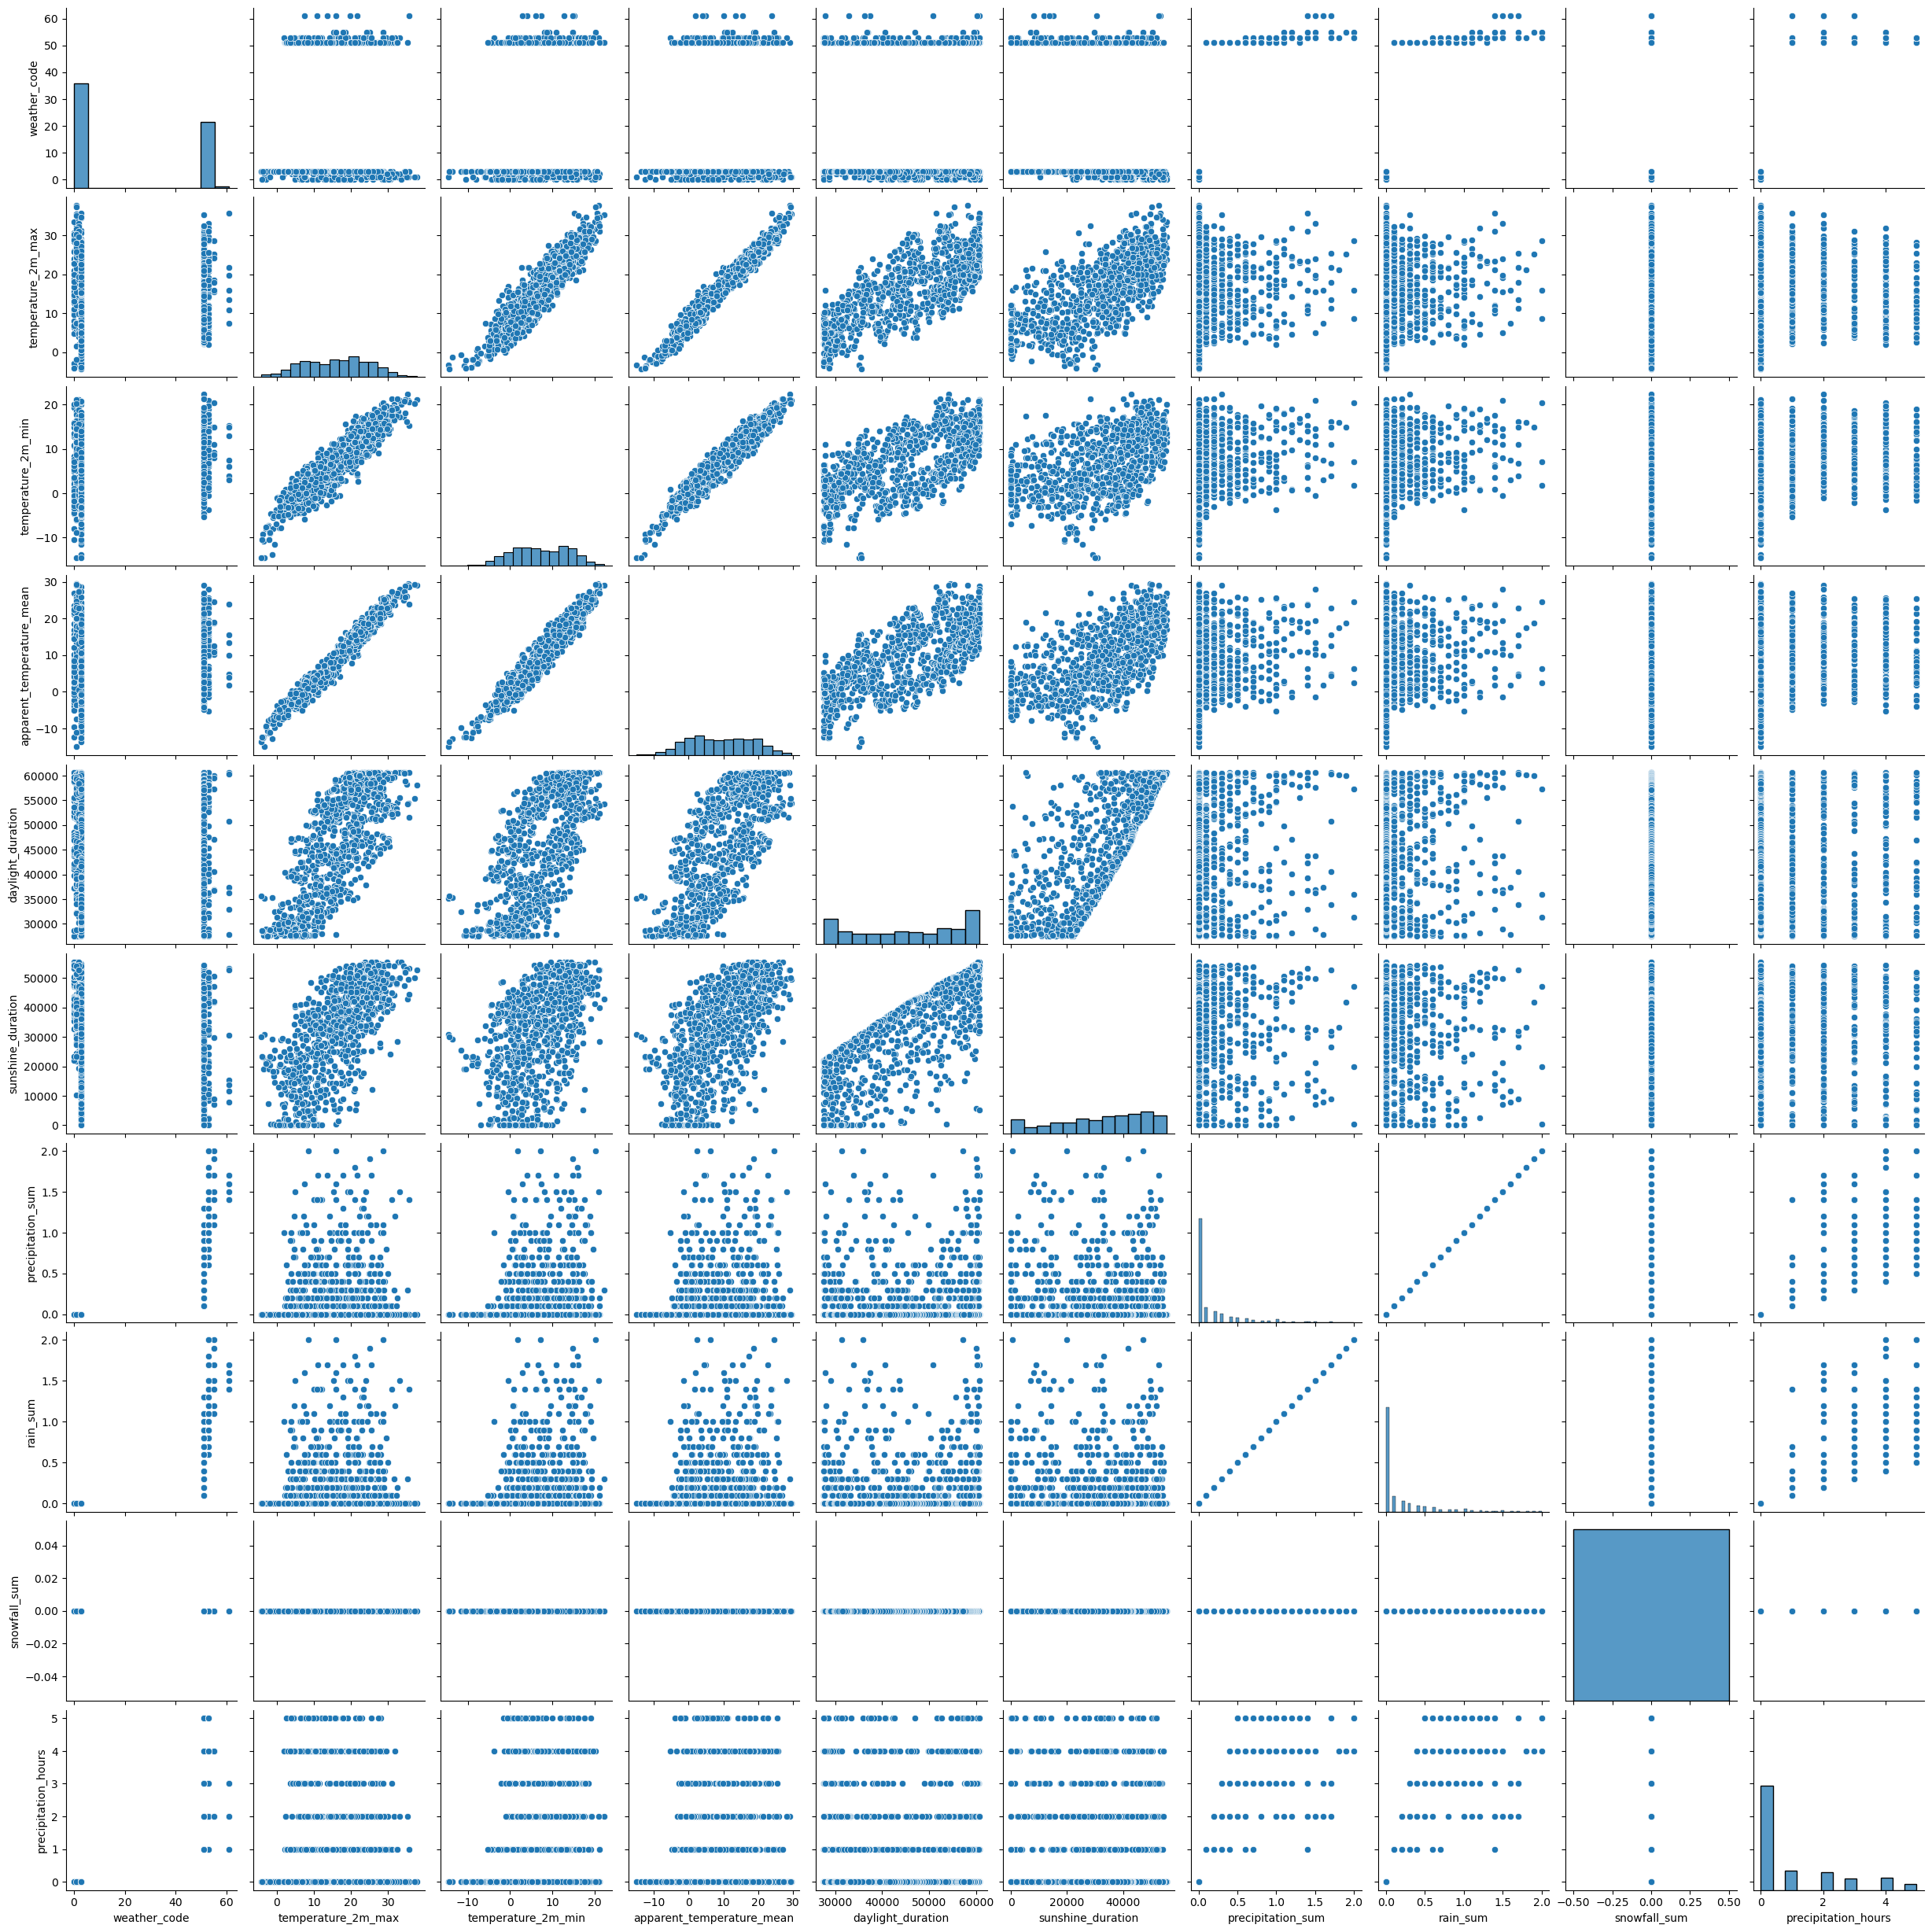

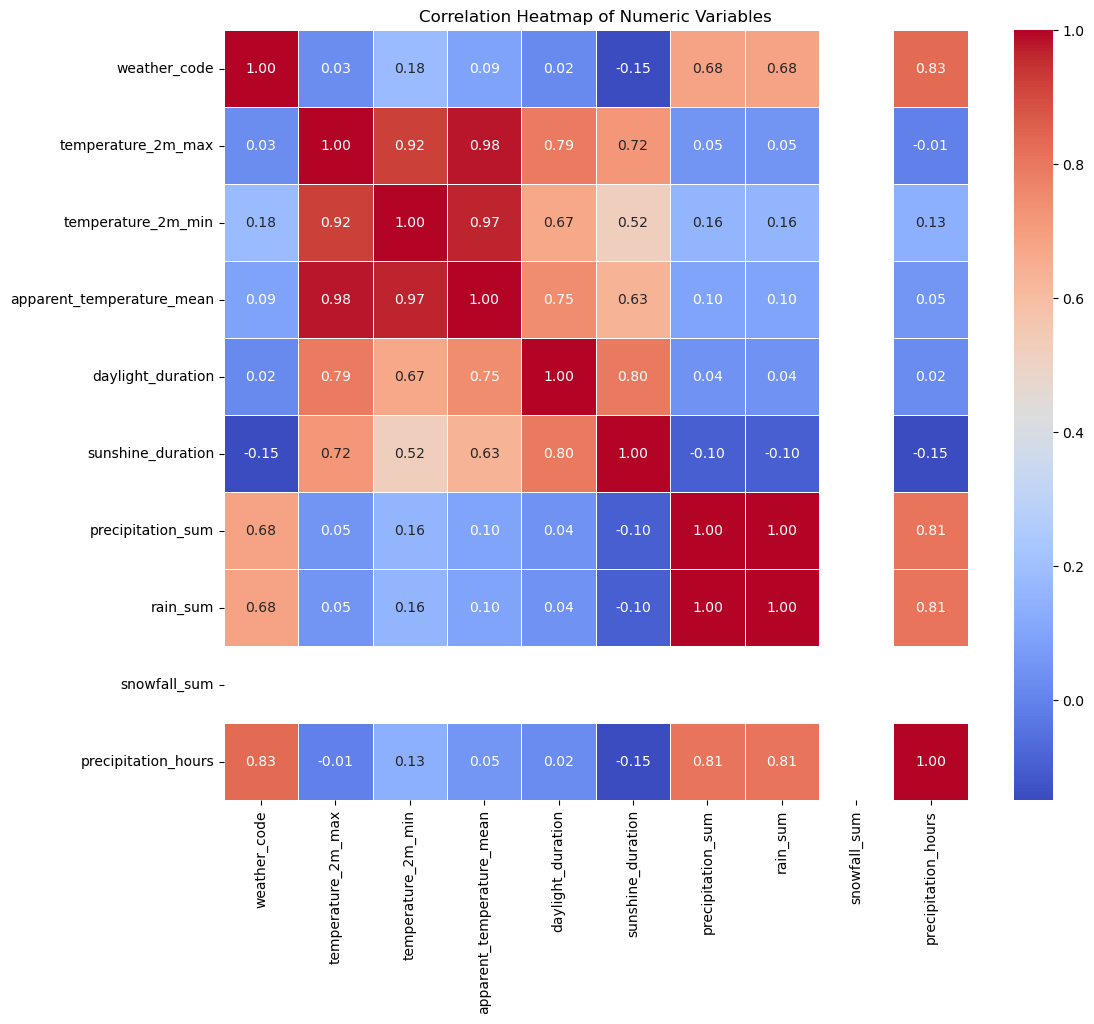

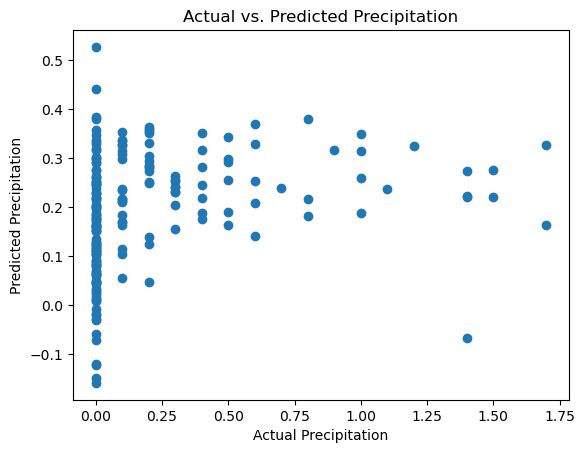

                            OLS Regression Results                            
Dep. Variable:      precipitation_sum   R-squared:                       0.098
Model:                            OLS   Adj. R-squared:                  0.094
Method:                 Least Squares   F-statistic:                     27.69
Date:                Wed, 27 Mar 2024   Prob (F-statistic):           5.21e-17
Time:                        12:08:04   Log-Likelihood:                -263.90
No. Observations:                 770   AIC:                             535.8
Df Residuals:                     766   BIC:                             554.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.2464      0

In [3]:
# Create object
plotting_tool = PlottingTool()


# Add preprocessed pandas DataFrame from before
plotting_tool.add_data_set(df_name_berlin, preprocessed_df, disable_feedback=True)

# Add a second time for plotting
df_name_berlin_2 = df_name_berlin+'_2'
plotting_tool.add_data_set(df_name_berlin_2, preprocessed_df, disable_feedback=True)

## Plot added pandas DataFrames in various ways

plotting_tool.plot_interactive({
    df_name_berlin: ['date', 'temperature_2m_max'],
    df_name_berlin_2: ['date', 'rain_sum']})

plotting_tool.plot_univariate_graphs(df_name_berlin, number_columns_unvariate_graphs=3)


# In this example the columns used for plotting bivariate graphs
# are the same as the ones to keep
plotting_tool.plot_bivariate_graphs(df_name_berlin, numeric_variables=columns_to_check)

plotting_tool.plot_correlation_heatmap(df_name_berlin, numeric_variables=columns_to_check)


# Create a regression model 

target_variable = 'precipitation_sum'

predictor_variables = ['temperature_2m_max', 
                       'temperature_2m_min', 
                       'daylight_duration']

regression_model_summary = plotting_tool.get_regression_model_summary(df_name_berlin, target_variable, predictor_variables, disable_feedback=True)
print(regression_model_summary)

##### Bokeh opens in browser

![title](img/bokeh1.png)
![title](img/bokeh2.png)